In [1]:
#The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(None, 'f250fdcd-cca8-4f77-9de6-d9c02c3919c3', 'p-20e03b82add8102e5369b2cb96ae8c8d36d0dc05')
pc = project.project_context

In [2]:
print('Project Name: {0}'.format(project.get_name()))
print('Project Description: {0}'.format(project.get_description()))
print('Project Bucket Name: {0}'.format(project.get_project_bucket_name()))
print('Project Assets (Connections): {0}'.format(project.get_assets(asset_type='connection')))

Project Name: Python Data Analysis
Project Description: Python Data Analysis
Project Bucket Name: pythondataanalysis-donotdelete-pr-xgmwfxjcvmypvc
Project Assets (Connections): []


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [4]:

#Getting csv file and loading as pandas datafarme
data = pd.read_csv(project.get_file('shampoo.csv'))
data.head(5)

,Month,Sales
0,1-Jan,266.0
1,2-Jan,145.9
2,3-Jan,183.1
3,4-Jan,119.3
4,5-Jan,180.3


In [5]:
data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd55db2b668>]],
      dtype=object)

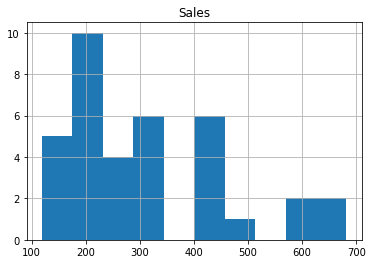

In [6]:
data.hist()

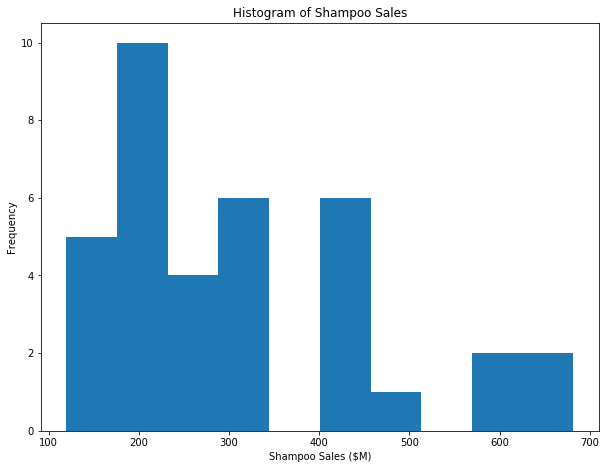

In [7]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.hist(data['Sales'])
plt.title('Histogram of Shampoo Sales');
plt.xlabel('Shampoo Sales ($M)');
plt.ylabel('Frequency');

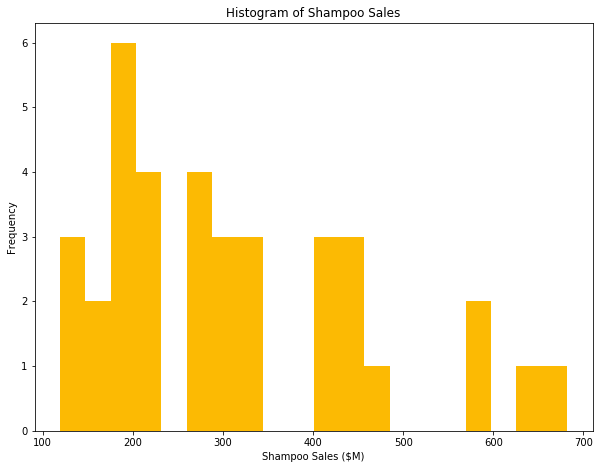

In [8]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.hist(data['Sales'], bins=20, color='#fcba03')
plt.title('Histogram of Shampoo Sales');
plt.xlabel('Shampoo Sales ($M)');
plt.ylabel('Frequency');

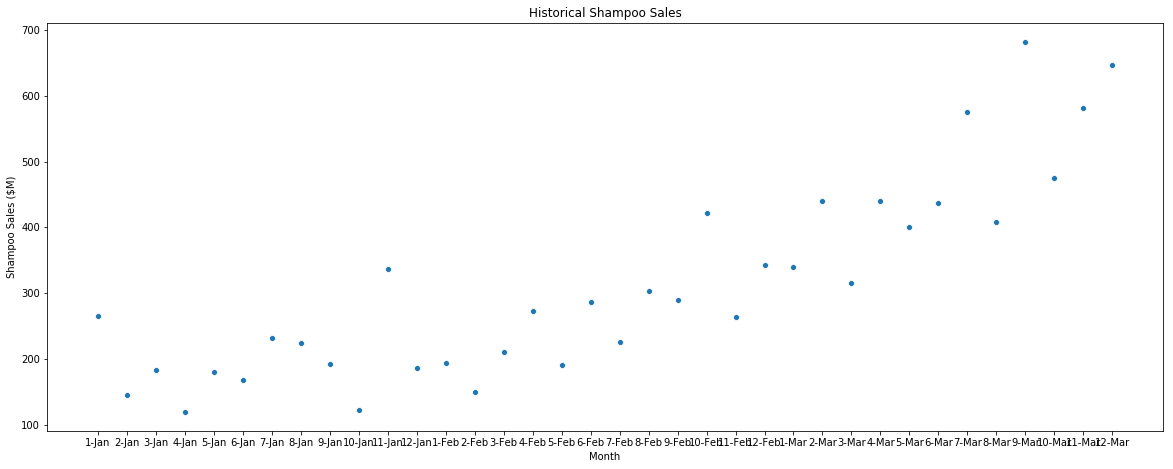

In [9]:
plt.figure(figsize=[20, 7.5]); # Set dimensions for figure
sns.scatterplot(x=data['Month'], y=data['Sales']);
plt.title('Historical Shampoo Sales');
plt.ylabel('Shampoo Sales ($M)');
plt.xlabel('Month');

In [10]:
#Getting csv file and loading as pandas datafarme
co2_dataset = pd.read_csv(project.get_file('co2_dataset.csv'))
co2_dataset.head(5)

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454,277.454,277.454
1,1,277.137,277.137,277.137
2,2,277.160,277.160,277.160
3,3,277.158,277.158,277.158
4,4,277.157,277.157,277.157


In [27]:
X = co2_dataset['year'].values[1950:]
X

array(['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957',
       '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014'], dtype=object)

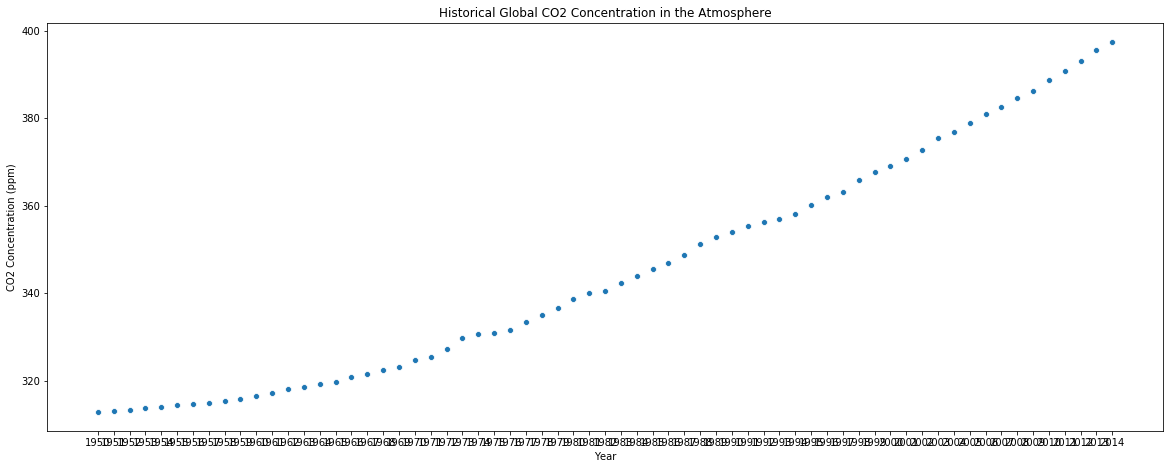

In [26]:
plt.figure(figsize=[20, 7.5]); # Set dimensions for figure
# Let's only consider the data from the year 1950
X = co2_dataset['year'].values[1950:]
y = co2_dataset['data_mean_global'].values[1950:]
sns.scatterplot(x=X, y=y);
plt.title('Historical Global CO2 Concentration in the Atmosphere');
plt.ylabel('CO2 Concentration (ppm)');
plt.xlabel('Year');

In [21]:

X = co2_dataset['year'].values[1950:].reshape(-1, 1)
y = co2_dataset['data_mean_global'].values[1950:].reshape(-1, 1)

reg = LinearRegression()

reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")

The slope is 1.3588711929152095 and the intercept is -2348.0338299979458


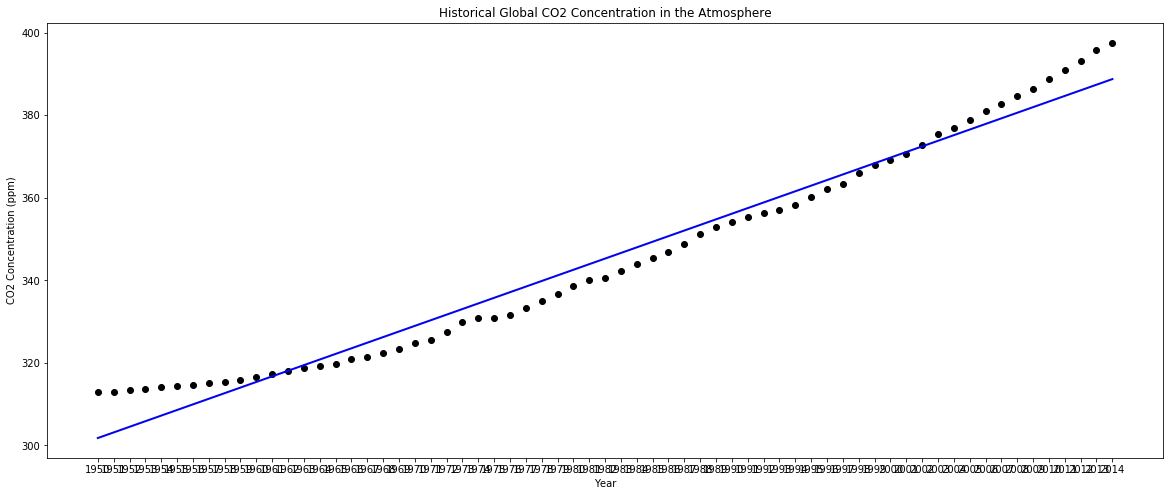

In [22]:
X = co2_dataset['year'].values[1950:]
y = co2_dataset['data_mean_global'].values[1950:]

predictions = reg.predict(X.reshape(-1, 1))

plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.title('Historical Global CO2 Concentration in the Atmosphere');
plt.ylabel('CO2 Concentration (ppm)');
plt.xlabel('Year');
plt.show()

In [28]:
X = sm.add_constant(co2_dataset['year'].values[1950:])

TypeError: unsupported operand type(s) for -: 'str' and 'str'